In [2]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:

file_path = 'training.csv'
df = pd.read_csv(file_path)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

sentiment_scores = df['text'].apply(lambda text: sid.polarity_scores(text)['compound'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_scores = scaler.fit_transform(sentiment_scores.values.reshape(-1, 1))

emotion_labels = {
    0: 'joy',
    1: 'sadness',
    2: 'anger',
    3: 'fear',
    4: 'love',
    5: 'surprise'
}

df['emotion_intensity'] = scaled_scores
df['emotion'] = df['label'].map(emotion_labels)
print(df[['text', 'emotion', 'emotion_intensity']])


                                                    text  emotion  \
0                                i didnt feel humiliated      joy   
1      i can go from feeling so hopeless to so damned...      joy   
2       im grabbing a minute to post i feel greedy wrong     fear   
3      i am ever feeling nostalgic about the fireplac...    anger   
4                                   i am feeling grouchy     fear   
...                                                  ...      ...   
15995  i just had a very brief time in the beanbag an...      joy   
15996  i am now turning and i feel pathetic that i am...      joy   
15997                     i feel strong and good overall  sadness   
15998  i feel like this was such a rude comment and i...     fear   
15999  i know a lot but i feel so stupid because i ca...      joy   

       emotion_intensity  
0               0.631076  
1               0.541525  
2               0.164728  
3               0.564840  
4               0.327119  
...      

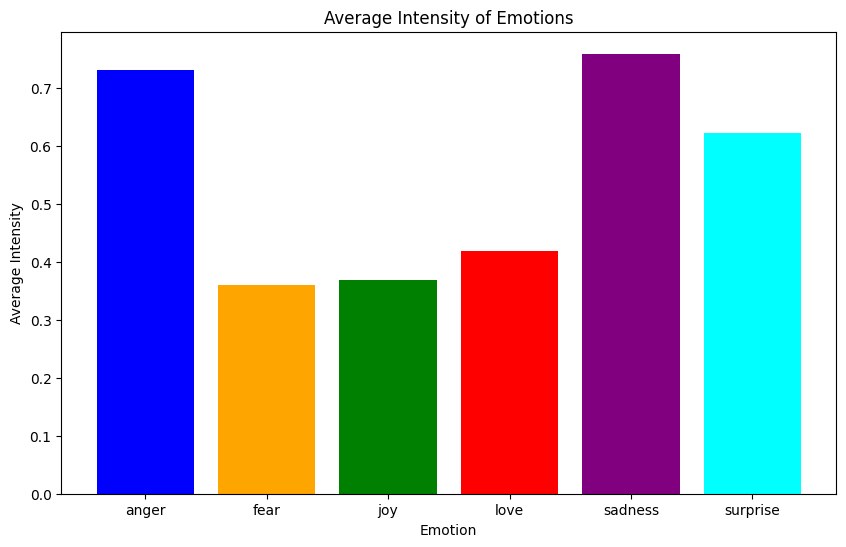

In [9]:


# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores = df['text'].apply(lambda text: sid.polarity_scores(text)['compound'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_scores = scaler.fit_transform(sentiment_scores.values.reshape(-1, 1))
emotion_labels = {
    0: 'joy',
    1: 'sadness',
    2: 'anger',
    3: 'fear',
    4: 'love',
    5: 'surprise'
}

df['emotion_intensity'] = scaled_scores
df['emotion'] = df['label'].map(emotion_labels)

grouped_df = df.groupby('emotion')['emotion_intensity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_df['emotion'], grouped_df['emotion_intensity'], color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.xlabel('Emotion')
plt.ylabel('Average Intensity')
plt.title('Average Intensity of Emotions')
plt.show()


In [26]:

file_path = 'training.csv'
df = pd.read_csv(file_path)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


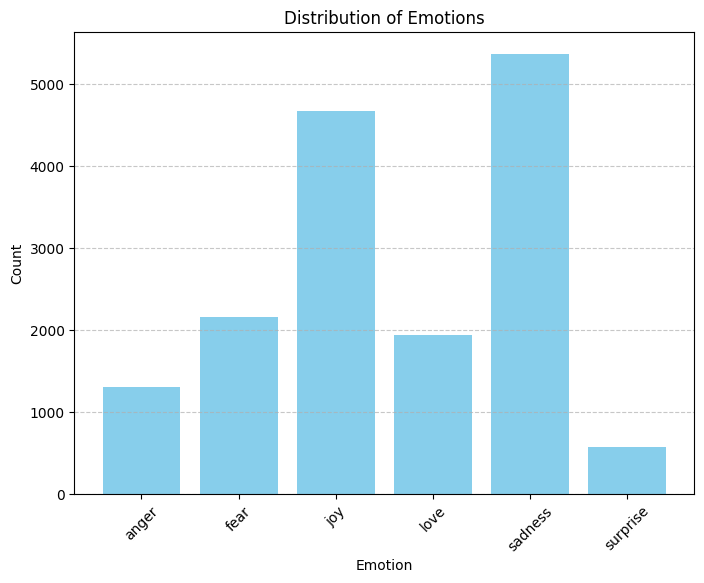

In [38]:

emotion_labels = {
    0: 'joy',
    1: 'sadness',
    2: 'anger',
    3: 'fear',
    4: 'love',
    5: 'surprise'
}

df['emotion'] = df['label'].map(emotion_labels)

emotion_counts = df['emotion'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
